In [1]:
import numpy as np
# to make this notebook's output stable across runs
np.random.seed(42)

from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784')
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

In [2]:
X,y = mnist["data"], mnist["target"]
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


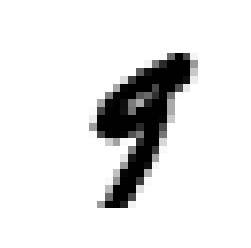

In [3]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_data = X[36000]
some_data_image = some_data.reshape(28, 28)
plt.imshow(some_data_image, cmap = matplotlib.cm.binary, interpolation = 'nearest')
plt.axis("off")
plt.show()

In [4]:
y[36000]

'9'

In [5]:
import numpy as np

X_train, y_train, X_test, y_test = X[:60000], y[:60000], X[60000:], y[60000:] 
y_train = y_train.astype(np.int8)
y_test = y_test.astype(np.int8)

In [6]:
import numpy as np

shuffled_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffled_index], y_train[shuffled_index]

In [7]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state = 42)
sgd_clf.fit(X_train,y_train_9)

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([some_data])

array([False])

In [10]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits = 3, random_state=42)

for train_index, test_index in skfolds.split(X_train, y_train):
    clone_clf = clone(sgd_clf)
    X_train_folds = X_train[train_index]
    y_train_folds = y_train_9[train_index]
    X_test_folds = X_train[test_index]
    y_test_folds = y_train_9[test_index]
    
    clone_clf.fit(X_train_folds, y_train_folds)
    y_pred = clone_clf.predict(X_test_folds)
    n_correct = sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9539092181563688


C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.8932946647332367


C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.9506425963894585


In [11]:
from sklearn.model_selection import cross_val_score

cross_val = cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring='accuracy')
cross_val

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.9476 , 0.9454 , 0.93815])

In [12]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict( sgd_clf, X_train, y_train_9, cv=3 )

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

In [13]:
from sklearn.metrics import confusion_matrix

confusion_matrix( y_train_9, y_train_pred )

array([[52141,  1910],
       [ 1467,  4482]], dtype=int64)

In [14]:
from sklearn.metrics import precision_score, recall_score

precision_score( y_train_9, y_train_pred )

0.701188986232791

In [15]:
recall_score( y_train_9, y_train_pred )

0.7534039334341907

In [16]:
from sklearn.metrics import f1_score

f1_score( y_train_9, y_train_pred )

0.7263592901709749

In [17]:
y_scores = sgd_clf.decision_function([some_data])
print(y_scores)
threshold = 0
y_some_data_pred = ( y_scores > threshold )
print(y_some_data_pred)

[-249064.39096412]
[False]


In [18]:
y_scores = sgd_clf.decision_function([some_data])
print(y_scores)
threshold = -300000
y_some_data_pred = ( y_scores > threshold )
print(y_some_data_pred)

[-249064.39096412]
[ True]


In [19]:
y_scores = cross_val_predict( sgd_clf, X_train, y_train_9, cv=3, method='decision_function' )
print(y_scores)

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

[-288474.45005811 -536678.52072512 -481663.17239007 ... -555052.6100157
 -877800.23562576  -77246.50152761]


In [20]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve( y_train_9, y_scores )
print(y_scores.shape)

(60000,)


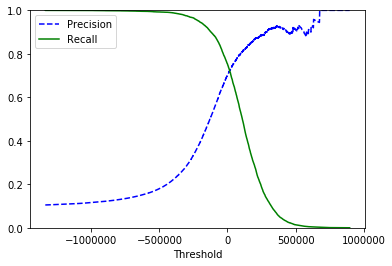

In [21]:
def plot_precision_recall_vs_threshold( precisions, recalls, thresholds ):
    plt.plot( thresholds, precisions[:-1], "b--", label='Precision' )
    plt.plot( thresholds, recalls[:-1], "g-", label="Recall" )
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0,1])
    
plot_precision_recall_vs_threshold( precisions, recalls, thresholds )
plt.show()

In [ ]:
plt.plot( recalls[:-1], precisions[:-1], "b-" )
plt.xlabel("recall")
plt.ylabel("precision")
plt.xlim([0,1])
plt.ylim([0,1])

In [ ]:
y_train_pred_80 = ( y_scores >80000 )
print( precision_score( y_train_9, y_train_pred_80 ) )
print( recall_score( y_train_9, y_train_pred_80 ) )

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve( y_train_9, y_scores )

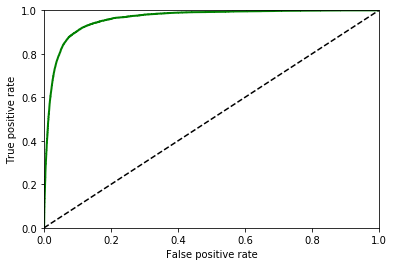

In [ ]:
def plot_roc_curve(fpr, tpr ):
    plt.plot( fpr, tpr,'g-', linewidth=2, label=None)
    plt.plot( [0,1], [0,1],'k--' )
    plt.axis( [0,1,0,1] )
    plt.xlabel('False positive rate')
    plt.ylabel('True positive rate')
    
plot_roc_curve(fpr,tpr)
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

roc_auc_score( y_train_9, y_scores )

0.9613245584078979

In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier( random_state=42 )

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0. 0. 0. ... 0. 0. 0.]


C:\Users\rajar\Anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


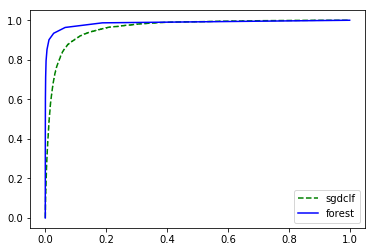

In [ ]:
y_probas_forest = cross_val_predict( forest_clf, X_train, y_train_9, cv = 3, method = 'predict_proba' )
y_score_forest = y_probas_forest[:,1]
print(y_score_forest)

from sklearn.metrics import roc_curve

fpr_forest,tpr_forest,thresholds_forest = roc_curve( y_train_9, y_score_forest )

plt.plot(fpr, tpr, 'g--', label='sgdclf')
plt.plot(fpr_forest,tpr_forest,'b-',label='forest')
plt.legend(loc='bottom right')

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score,recall_score

y_predict_forest = cross_val_predict( forest_clf, X_train, y_train_9, cv=3 )

print( f'precision {precision_score(y_train_9, y_predict_forest)} \n reacll {recall_score(y_train_9, y_predict_forest)}' )
print( f'roc_auc = {roc_auc_score( y_train_9,y_score_forest)}' )

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


precision 0.9714579055441478 
 reacll 0.7952597075138679
roc_auc = 0.9862674133003122


In [ ]:
from sklearn.linear_model import SGDClassifier 

sgd_clf = SGDClassifier( random_state = 42 )
sgd_clf.fit( X_train, y_train )
sgd_clf.predict([some_data])

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([4], dtype=int8)

In [ ]:
some_data_score = sgd_clf.decision_function([some_data])
some_data_score

array([[-736165.13534356, -391182.59305387, -752094.90919363,
        -199593.6564959 ,  -33428.88555026, -176288.21703149,
        -856742.40238951, -145757.71304016, -253587.97052021,
        -249064.39096412]])

In [ ]:
np.argmax(some_data_score)

4

In [ ]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int8)

In [ ]:
from sklearn.multiclass import OneVsOneClassifier
from sklearn.linear_model import SGDClassifier

ovo = OneVsOneClassifier( SGDClassifier(random_state = 42) )
ovo.fit(X_train, y_train)
print( ovo.predict([some_data]) )
print( len(ovo.estimators_) )

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[9]
45


In [ ]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier( random_state = 42 )
forest_clf.fit( X_train, y_train )
forest_clf.predict( [some_data] )
forest_clf.predict_proba([some_data])

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([[0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0.9]])

In [ ]:
from sklearn.model_selection import cross_val_score

cross_val_score( sgd_clf, X_train, y_train, cv=3, scoring = 'accuracy')

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.81908618, 0.86379319, 0.84492674])

In [ ]:
cross_val_score(forest_clf, X_train, y_train,  cv=3, scoring='accuracy')

array([0.94031194, 0.94144707, 0.94059109])

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([0.91131774, 0.90884544, 0.90883633])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix

y_train_pred = cross_val_predict( sgd_clf, X_train_scaled, y_train, cv=3 )
conf_mat = confusion_matrix( y_train, y_train_pred )
conf_mat

C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
C:\Users\rajar\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=

array([[5730,    2,   22,    9,   11,   52,   47,    8,   39,    3],
       [   1, 6459,   54,   29,    6,   43,    6,   11,  123,   10],
       [  53,   34, 5371,   90,   80,   23,   79,   57,  157,   14],
       [  48,   37,  147, 5315,    3,  248,   36,   58,  143,   96],
       [  20,   25,   45,   10, 5338,   10,   49,   36,   87,  222],
       [  72,   40,   38,  170,   72, 4616,  108,   28,  186,   91],
       [  35,   24,   56,    1,   39,   86, 5622,    6,   49,    0],
       [  22,   20,   73,   28,   48,   12,    4, 5832,   18,  208],
       [  53,  146,   84,  152,   14,  147,   55,   27, 5037,  136],
       [  44,   33,   29,   89,  164,   39,    3,  211,   77, 5260]],
      dtype=int64)

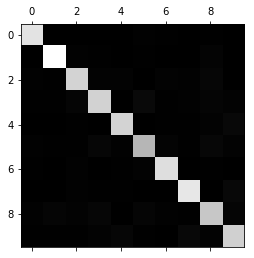

In [ ]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

plt.matshow( conf_mat, cmap = plt.cm.gray )

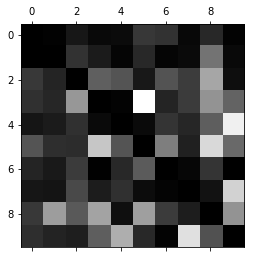

In [ ]:
row_sums = conf_mat.sum(axis=1, keepdims=True)
norm_conf_mat = conf_mat / row_sums
np.fill_diagonal( norm_conf_mat, 0 )
plt.matshow( norm_conf_mat, cmap = plt.cm.gray )

In [ ]:
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

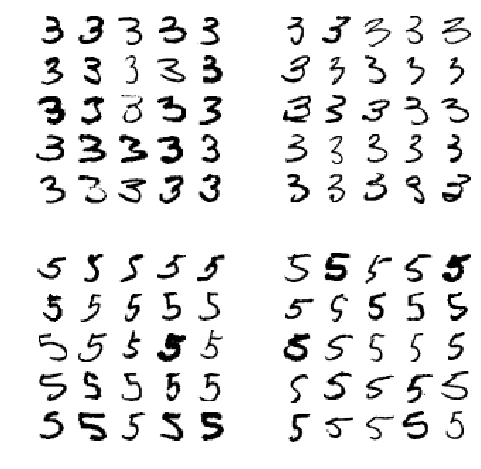

In [ ]:
X_33 = X_train[ ( y_train == 3 ) & ( y_train_pred == 3 ) ]
X_35 = X_train[ ( y_train == 3 ) & ( y_train_pred == 5 ) ]
X_53 = X_train[ ( y_train == 5 ) & ( y_train_pred == 3 ) ]
X_55 = X_train[ ( y_train  ==5 ) & ( y_train_pred == 5 ) ]

plt.figure(figsize= (8,8))

plt.subplot(221) 
plot_digits(X_33[:25], images_per_row = 5 )

plt.subplot(222)
plot_digits(X_35[:25], images_per_row=5)

plt.subplot(223)
plot_digits(X_53[:25], images_per_row = 5)

plt.subplot(224)
plot_digits(X_55[:25], images_per_row = 5)
plt.show()

In [ ]:
y_train_large = (y_train >= 7)
y_train_odd = (y_train % 2 == 1 )
y_multilabel = np.c_[y_train_large, y_train_odd]
y_multilabel.shape

(60000, 2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neighbor_clf = KNeighborsClassifier()
neighbor_clf.fit(X_train, y_multilabel)
neighbor_clf.predict([some_data])

array([[ True,  True]])

In [ ]:
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict( neighbor_clf, X_train, y_multilabel, cv=3 )
f1_score( y_multilabel, y_train_pred, average = 'macro' )